In [1]:
%matplotlib inline

In [2]:
import os
from galsize_models.measurements import load_sdss_size_vs_stellar_mass
repodirname = "/Users/aphearin/work/repositories/python/galsize_models"
subdirname = "galsize_models/measurements/data/one_point_functions"
dirname = os.path.join(repodirname, subdirname)


from galsize_models.measurements import tabulate_sdss_size_vs_stellar_mass
tabulate_sdss_size_vs_stellar_mass(dirname)
_sdss = load_sdss_size_vs_stellar_mass(dirname, statistic='median')
logsm_bins, mean_size_all_sdss, \
mean_size_q_sdss, mean_size_sf_sdss, mean_size_gv_sdss,\
scatter_size_all_sdss, scatter_size_q_sdss, scatter_size_sf_sdss, scatter_size_gv_sdss = _sdss
logsm_mids = 0.5*(logsm_bins[:-1] + logsm_bins[1:])


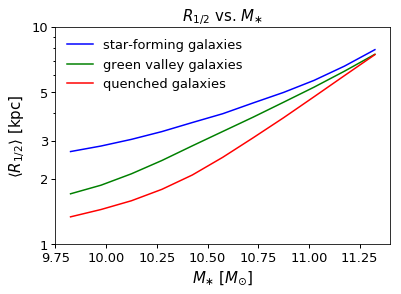

In [3]:
from matplotlib import ticker
from scipy.signal import savgol_filter

fig, ax = plt.subplots(1, 1)
yscale = ax.set_yscale('log')

sm_mids = 10**logsm_mids

mean_size_sf_smooth = savgol_filter(mean_size_sf_sdss, 7, 3)
mean_size_gv_smooth = savgol_filter(mean_size_gv_sdss, 7, 3)
mean_size_q_smooth = savgol_filter(mean_size_q_sdss, 7, 3)

__=ax.plot(logsm_mids, mean_size_sf_smooth, color='blue', label='star-forming galaxies')
__=ax.plot(logsm_mids, mean_size_gv_smooth, color='green', label='green valley galaxies')
__=ax.plot(logsm_mids, mean_size_q_smooth, color='red', label='quenched galaxies')

legend = ax.legend()

ylim = ax.set_ylim(1, 10)
__=ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_yaxis().set_minor_formatter(ticker.NullFormatter())
__=ax.set_yticks((1, 2, 3, 5, 10))

title = ax.set_title(r'$R_{1/2}$ vs. $M_{\ast}$')
xlabel = ax.set_xlabel(r'$M_{\ast}$ [$M_{\odot}$]')
ylabel = ax.set_ylabel(r'$\langle R_{1/2}\rangle$ [kpc]')

# fig.savefig('size_vs_stellar_mass_sdss.pdf', bbox_extra_artists=[xlabel, ylabel], 
#             bbox_inches='tight')
